# Tarea - Ajuste de curvas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [4]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

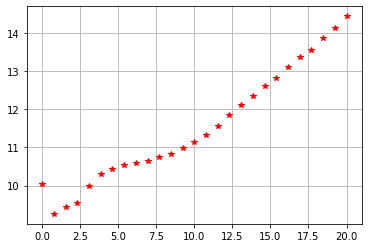

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

m = 27 # El número de muestras son 26, que son los datos del 2014 al 2040
x = np.linspace(0, 20, m)
y = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

%matplotlib inline
plt.figure()
plt.plot(x, y, "*r")
plt.grid()

In [14]:
def funcion_de_costo(beta, X, y) :
    beta = np.reshape(beta, [2, -1])
    pred = X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo[0][0]

In [15]:
# Matriz X de polinomio de grado 1
ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
X = np.hstack( (ones, x_1) )

In [16]:
beta_inicial = np.random.rand(2) # vector aleatorio de 2 porque beta tiene 2 elementos
y = np.reshape(y, [m, -1])

In [17]:
funcion_de_costo(beta_inicial, X, y)

1548.804776064021

In [18]:
import scipy.optimize as opt
sol = opt.minimize(funcion_de_costo, 
                  beta_inicial,
                  args = (X, y))
sol

      fun: 2.3704889518148637
 hess_inv: array([[ 0.07010662, -0.0051589 ],
       [-0.0051589 ,  0.00051591]])
      jac: array([2.98023224e-08, 2.08616257e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([9.11567625, 0.24267173])

In [21]:
y_pred1 = 9.11567625 + 0.24267173*x

In [22]:
def funcion_de_costo(beta, X, y) :
    beta = np.reshape(beta, [3, -1]) #porque pára este caso beta es un vector con 3 elementos, estamos forzando que sea un vector columna, para eso es el reshape
    pred = X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo[0][0]

# Matriz X
ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])
X = np.hstack( (ones, x_1, x_2) )

beta_inicial = np.random.rand(3)
y = np.reshape(y, [m, -1])

funcion_de_costo(beta_inicial, X, y)

166226.10760168216

In [23]:
import scipy.optimize as opt
sol = opt.minimize(funcion_de_costo, 
                  beta_inicial,
                  args = (X, y))
sol

      fun: 0.8443845166074282
 hess_inv: array([[ 1.44225510e-01, -2.82840730e-02,  1.15626713e-03],
       [-2.82840730e-02,  7.73097987e-03, -3.60755341e-04],
       [ 1.15626713e-03, -3.60755341e-04,  1.80377670e-05]])
      jac: array([0.00000000e+00, 1.26659870e-07, 4.47034836e-08])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 4
     njev: 8
   status: 0
  success: True
        x: array([9.59129685e+00, 9.42781029e-02, 7.41968137e-03])

In [24]:
y_pred_2 = 9.59129685e+00 + 9.42781029e-02*x + 7.41968137e-03*x**2

In [6]:
import numpy as np
m = 27
x = np.linspace(0, 20, m)
y = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])



def funcion_de_costo(beta, X, y) :
    beta = np.reshape(beta, [4, -1]) #porque pára este caso beta es un vector con 4 elementos, estamos forzando que sea un vector columna, para eso es el reshape
    pred = X @ beta
    costo = (y-pred).T @ (y-pred)
    return costo[0][0]

# Matriz X
ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])
x_3 = np.reshape(x**3, [m, -1])
X = np.hstack( (ones, x_1, x_2, x_3) )

beta_inicial = np.random.rand(4)
y = np.reshape(y, [m, -1])

funcion_de_costo(beta_inicial, X, y)

50137235.65478173

In [7]:
import scipy.optimize as opt
sol = opt.minimize(funcion_de_costo, 
                  beta_inicial,
                  args = (X, y))
sol

      fun: 0.8404169183092955
 hess_inv: array([[ 2.27239543e-01, -8.33500526e-02,  8.17095366e-03,
        -2.33822887e-04],
       [-8.33500526e-02,  4.42580810e-02, -5.01383085e-03,
         1.55102518e-04],
       [ 8.17095366e-03, -5.01383085e-03,  6.10778797e-04,
        -1.97580344e-05],
       [-2.33822887e-04,  1.55102518e-04, -1.97580344e-05,
         6.58601150e-07]])
      jac: array([-7.45058060e-09, -2.45869160e-07, -2.98023224e-08, -1.04308128e-07])
  message: 'Optimization terminated successfully.'
     nfev: 50
      nit: 5
     njev: 10
   status: 0
  success: True
        x: array([9.56646842e+00, 1.10747629e-01, 5.32167883e-03, 6.99334210e-05])

In [ ]:
y_pred3 = 9.56646842e+00 + 1.10747629e-01*x + 5.32167883e-03*x**2 + 6.99334210e-05**x*3

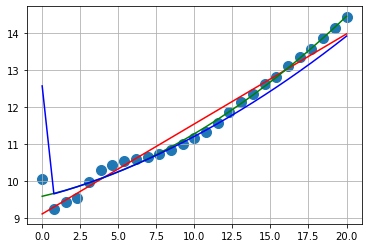

In [25]:
y_pred1 = 9.11567625 + 0.24267173*x
y_pred2 = 9.59129685e+00 + 9.42781029e-02*x + 7.41968137e-03*x**2
y_pred3 = 9.56646842e+00 + 1.10747629e-01*x + 5.32167883e-03*x**2 + 6.99334210e-05**x*3

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x, y, s = 100)
plt.plot(x, y_pred1, "r")
plt.plot(x, y_pred2, "g")
plt.plot(x, y_pred3, "b")
plt.grid()

## Resultados

Para este ejercicio propuse tres modelos, un modelo basado en un polinimio de grado 1, un modelo de polinomio de grado 2 y un modelo de polinomio de grado 3. Los modelos obtenidos fueron los siguientes:

- $ y = 0.24267173x + 9.1156762 $
- $ y = 7.41968137e-03x^2 + 9.42781029e-02x + 9.59129685e+00 $
- $ y = 6.99334210e-05x^3 + 5.32167883e-03x^2 + 1.10747629e-01x + 9.56646842e+00 $

Viendo el gráfico obtenido, el polinomio de grado 3 es el modelo que mejor se ajusta a los puntos

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

In [33]:
import pandas as pd
pd.read_csv?

In [37]:
data = pd.read_csv('population_data.csv')

In [38]:
data

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752
...,...,...,...,...
61,2011,115683,2586287,590693
62,2012,117054,2498880,602354
63,2013,118395,2478889,623599
64,2014,119713,2463420,633641


In [48]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(data["Year"])
y = np.array(data["Poblacion"])
m = 66

In [49]:
x

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
      dtype=int64)

In [50]:
y

array([ 28296,  29110,  29980,  30904,  31880,  32906,  33978,  35095,
        36253,  37448,  38677,  39939,  41234,  42564,  43931,  45339,
        46784,  48264,  49788,  51361,  52988,  54669,  56396,  58156,
        59931,  61708,  63486,  65261,  67013,  68715,  70353,  71916,
        73416,  74880,  76351,  77859,  79410,  80999,  82635,  84327,
        86077,  87890,  89758,  91654,  93542,  95393,  97202,  98969,
       100679, 102317, 103874, 105340, 106724, 108056, 109382, 110732,
       112117, 113530, 114968, 116423, 114255, 115683, 117054, 118395,
       119713, 121005], dtype=int64)

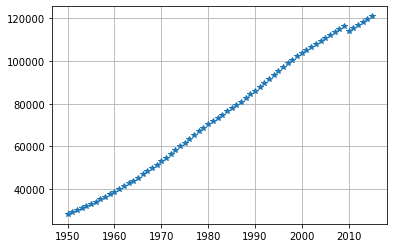

In [47]:
%matplotlib inline
plt.figure()
plt.plot(x, y, "*")
plt.grid()

In [56]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(data["Year"])
y = np.array(data["Poblacion"])
m = 66

def funcion_poblacion_contra_años(beta, X, y) :
    beta = np.reshape(beta, [2, -1])
    pred = X @ beta
    resultado = (y-pred).T @ (y-pred)
    return resultado[0][0]

# Matriz X
ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
X = np.hstack( (ones, x_1) )

beta_inicial = np.random.rand(2)
y = np.reshape(y, [m, -1])

funcion_poblacion_contra_años(beta_inicial, X, y)

403824563443.4399

In [57]:
import scipy.optimize as opt
sol = opt.minimize(funcion_poblacion_contra_años, 
                  beta_inicial,
                  args = (X, y))
sol

      fun: 212137189.720306
 hess_inv: array([[ 3.86370187e+01, -1.95225395e-02],
       [-1.95225395e-02,  9.86574680e-06]])
      jac: array([3.0000e+01, 5.9952e+04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 309
      nit: 36
     njev: 99
   status: 2
  success: False
        x: array([-2.98655776e+06,  1.54394711e+03])

In [63]:
y1 = -2.98655776e+06 + 1.54394711e+03*x

In [60]:
def funcion_poblacion_contra_años(beta, X, y) :
    beta = np.reshape(beta, [3, -1])
    pred = X @ beta
    resultado = (y-pred).T @ (y-pred)
    return resultado[0][0]

# Matriz X
ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])
X = np.hstack( (ones, x_1, x_2) )

beta_inicial = np.random.rand(3)
y = np.reshape(y, [m, -1])

funcion_poblacion_contra_años(beta_inicial, X, y)

410687860805.63745

In [61]:
import scipy.optimize as opt
sol = opt.minimize(funcion_poblacion_contra_años, 
                  beta_inicial,
                  args = (X, y))
sol

      fun: 211769708.9959285
 hess_inv: array([[ 9.99998976e-01, -1.01172149e-03,  2.55898934e-07],
       [-1.01172149e-03,  2.19119907e-05, -1.07923796e-08],
       [ 2.55898934e-07, -1.07923796e-08,  5.37773459e-12]])
      jac: array([-5.00000000e+01, -9.92700000e+04, -1.86783476e+08])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 288
      nit: 2
     njev: 69
   status: 2
  success: False
        x: array([-4.92078526e-01, -1.46917349e+03,  7.59909726e-01])

In [64]:
y2 = -4.92078526e-01 + -1.46917349e+03*x + 7.59909726e-01*x**2

In [68]:
def funcion_poblacion_contra_años(beta, X, y) :
    beta = np.reshape(beta, [4, -1])
    pred = X @ beta
    resultado = (y-pred).T @ (y-pred)
    return resultado[0][0]

# Matriz X
ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])
x_3 = np.reshape(x**3, [m, -1])
X = np.hstack( (ones, x_1, x_2, x_3) )

beta_inicial = np.random.rand(4)
y = np.reshape(y, [m, -1])

funcion_poblacion_contra_años(beta_inicial, X, y)

1.5925705843183159e+21

In [69]:
import scipy.optimize as opt
sol = opt.minimize(funcion_poblacion_contra_años, 
                  beta_inicial,
                  args = (X, y))
sol

      fun: 5.794323483531165e+20
 hess_inv: array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  1.04798775e-21, -4.76917283e-22,
         2.40186058e-25],
       [ 0.00000000e+00, -4.76917283e-22,  5.41136095e-12,
        -2.35157246e-15],
       [ 0.00000000e+00,  2.40186058e-25, -2.35155120e-15,
         4.57282593e-18]])
      jac: array([ 0.00000000e+00, -7.74056186e+14, -1.53756586e+18, -3.04960359e+21])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 115
      nit: 3
     njev: 23
   status: 2
  success: False
        x: array([  0.85269744,  21.85160907, -60.98431637,  -0.34925358])

In [70]:
y3 = 0.85269744 +  21.85160907*x + -60.98431637*x**2 + -0.34925358*x**3

ValueError: x and y must have same first dimension, but have shapes (1950,) and (66,)

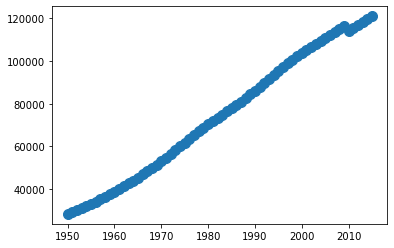

In [80]:
y1 = -2.98655776e+06 + 1.54394711e+03*x
y2 = -4.92078526e-01 + -1.46917349e+03*x + 7.59909726e-01*x**2
y3 = 0.85269744 +  21.85160907*x + -60.98431637*x**2 + -0.34925358*x**3
x1 = np.linspace(0, 20, x[0])

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter(x, y, s = 100)
plt.plot(x1, y1, "r")
plt.plot(x1, y2, "g")
plt.plot(x1, y3, "b")
plt.grid()

In [82]:
import pandas as pd

In [83]:
data = pd.read_csv('population_data.csv')

In [84]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(data["Year"])
y = np.array(data["Nacimientos"])
m = 66

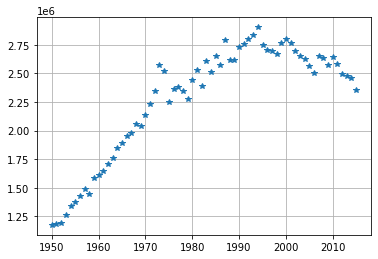

In [85]:
%matplotlib inline
plt.figure()
plt.plot(x, y, "*")
plt.grid()

In [87]:
def funcion_poblacion_contra_años(beta, X, y) :
    beta = np.reshape(beta, [2, -1])
    pred = X @ beta
    resultado = (y-pred).T @ (y-pred)
    return resultado[0][0]

# Matriz X
ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
X = np.hstack( (ones, x_1) )

beta_inicial = np.random.rand(2)
y = np.reshape(y, [m, -1])

funcion_poblacion_contra_años(beta_inicial, X, y)

358457742357113.1

In [88]:
import scipy.optimize as opt
sol = opt.minimize(funcion_poblacion_contra_años, 
                  beta_inicial,
                  args = (X, y))
sol

      fun: 4755043208175.756
 hess_inv: array([[ 2.27373675e-13, -1.11022302e-16],
       [-1.11022302e-16,  2.33239161e-08]])
      jac: array([-1.3107200e+05, -2.3855104e+08])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 205
      nit: 10
     njev: 67
   status: 2
  success: False
        x: array([-4.29649154e+07,  2.28202135e+04])

In [89]:
y_1 = -4.29649154e+07 + 2.28202135e+04*x

In [90]:
def funcion_poblacion_contra_años(beta, X, y) :
    beta = np.reshape(beta, [3, -1])
    pred = X @ beta
    resultado = (y-pred).T @ (y-pred)
    return resultado[0][0]

# Matriz X
ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])
X = np.hstack( (ones, x_1, x_2) )

beta_inicial = np.random.rand(3)
y = np.reshape(y, [m, -1])

funcion_poblacion_contra_años(beta_inicial, X, y)

31319648029904.984

In [91]:
import scipy.optimize as opt
sol = opt.minimize(funcion_poblacion_contra_años, 
                  beta_inicial,
                  args = (X, y))
sol

      fun: 4852490578184.554
 hess_inv: array([[ 9.99998731e-01, -1.12636658e-03,  3.13456737e-07],
       [-1.12636658e-03,  2.21594636e-05, -1.08877341e-08],
       [ 3.13456737e-07, -1.08877341e-08,  5.41110335e-12]])
      jac: array([0.00000000e+00, 1.27139840e+07, 2.51249951e+10])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 172
      nit: 2
     njev: 40
   status: 2
  success: False
        x: array([-2.13081446e+01, -1.95657036e+04,  1.04476671e+01])

In [92]:
y_2 = -2.13081446e+01 + -1.95657036e+04*x + 1.04476671e+01*x**2

In [93]:
def funcion_poblacion_contra_años(beta, X, y) :
    beta = np.reshape(beta, [4, -1])
    pred = X @ beta
    resultado = (y-pred).T @ (y-pred)
    return resultado[0][0]

# Matriz X
ones = np.ones([m, 1])
x_1 = np.reshape(x, [m, -1])
x_2 = np.reshape(x**2, [m, -1])
x_3 = np.reshape(x**3, [m, -1])
X = np.hstack( (ones, x_1, x_2, x_3) )

beta_inicial = np.random.rand(4)
y = np.reshape(y, [m, -1])

funcion_poblacion_contra_años(beta_inicial, X, y)

3.354736218023297e+20

In [94]:
import scipy.optimize as opt
sol = opt.minimize(funcion_poblacion_contra_años, 
                  beta_inicial,
                  args = (X, y))
sol

      fun: 1874226578557.6057
 hess_inv: array([[ 7.82941307e-02,  5.56129631e-06, -6.58899631e-08,
         2.17712334e-11],
       [ 5.56129646e-06,  2.81604840e-09, -8.32406907e-12,
         2.69899544e-15],
       [-6.58966202e-08, -8.32406932e-12,  4.80713495e-12,
        -2.41293063e-15],
       [ 2.17745929e-11,  2.69899557e-15, -2.41293063e-15,
         1.21313204e-18]])
      jac: array([ 0.00000000e+00, -1.23486208e+08, -2.79148577e+11, -5.52628466e+14])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 1012
      nit: 38
     njev: 200
   status: 2
  success: False
        x: array([-1.22035059e+05, -7.05481191e+05,  7.02713492e+02, -1.74636973e-01])

In [95]:
y3 = -1.22035059e+05 + -7.05481191e+05*x +  7.02713492e+02*x**2 + -1.74636973e-01*x**3

ValueError: x and y must have same first dimension, but have shapes (1950,) and (66,)

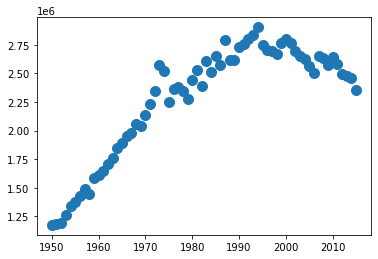

In [99]:
y1 = -4.29649154e+07 + 2.28202135e+04*x
y2 = -2.13081446e+01 + -1.95657036e+04*x + 1.04476671e+01*x**2
y3 = -1.22035059e+05 + -7.05481191e+05*x +  7.02713492e+02*x**2 + -1.74636973e-01*x**3
x1 = np.linspace(0, 20, x[0])

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter(x, y, s = 100)
plt.plot(x1, y1, "r")
plt.plot(x1, y2, "g")
plt.plot(x1, y3, "b")
plt.grid()